In [97]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def get_log_melspectrogram(audio, sr = 22050, hop_length = 220, n_fft = 1024, n_mels = 128, visualize=True):
    """Return the log-scaled Mel bands of an audio signal."""
    audio_norm =(audio-audio.mean()) / audio.std()
    bands = librosa.feature.melspectrogram(
        y=audio_norm, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels, dtype=np.float32)
    M =librosa.core.power_to_db(bands, amin=1e-7)
    if visualize:
        plt.imshow(M)
    return M

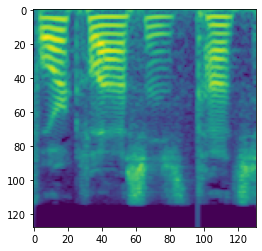

In [98]:
audio_path = '/home/lev/datasets/musan/speech/librivox/speech-librivox-0000.wav'
arr, sr = librosa.load(audio_path)
arr = arr[:int(22050*1.3)]

M = get_log_melspectrogram(arr)
Audio((arr-arr.mean()) / arr.std(), sr)

In [99]:
sr = 22050
hop_length = 220
n_fft = 1024
n_mels = 128

In [100]:
M_power = librosa.core.db_to_power(M)
new_arr = librosa.feature.inverse.mel_to_audio(M_power,n_fft=n_fft, hop_length=hop_length, n_iter=64)

In [101]:

Audio(new_arr, sr)

In [102]:
np.sum((new_arr - arr[:28600])**2)

689.7833

In [73]:
hop_length = 220
n_fft = 1024

M = librosa.feature.melspectrogram(arr, n_fft=n_fft, hop_length=hop_length, fmin = 64, fmax = 8000, n_mels=128)
M = librosa.core.power_to_db(M, amin=1e-7)
M = librosa.core.db_to_power(M)
arr2 = librosa.feature.inverse.mel_to_audio(M, n_fft=n_fft, hop_length=hop_length)

In [75]:
np.sum((arr[:28000] - arr2[:28000])**2)

694.48175

In [63]:
arr2
Audio(arr2, sr)

In [46]:
Audio(arr, sr)

In [48]:
Audio(new_arr, sr)